In [1]:
%load_ext autoreload
%autoreload 2

import logging

logging.basicConfig(level=logging.WARNING)
logging.getLogger('anonymigraph').setLevel(logging.WARNING)
logging.getLogger('anonymigraph.metrics').setLevel(logging.WARNING)


In [2]:
from anonymigraph.metrics.evaluator import Evaluator
from anonymigraph.metrics.utility.structural.privacy_metrics import PercentageKDegreeAnonMetric

from anonymigraph.metrics.utility.structural import (
    DegreeCentralityMetric,
    EigenvectorMetric,
    PageRankMetric,
    ClosenessCentralityMetric,
    LocalClusteringCoefficientMetric,
    WLColorMetric,

    ConnectedComponentsMetric,
    NumberOfEdgesMetric,
    NumberOfNodesMetric,
    NumberOfTrianglesMetric,
    MeanDegreeMetric,
    MaxDegreeMetric,
    MedianDegreeMetric,
    AverageClusteringCoefficientMetric,
    TransitivityMetric,

    EdgeJaccardMetric,
    KatzCentralityMetric,

)

from anonymigraph.anonymization import (
    KDegreeAnonymizer,
    RandomEdgeAddDelAnonymizer,
    ConfigurationModelAnonymizer,
    NestModelAnonymizer,
    PygmalionModelAnonymizer,
    PrivateColorAnonymizer,
)


# Polbooks

In [ ]:
import networkx as nx
from scipy.sparse.linalg import eigs
import numpy as np
import os
import urllib.request
import pickle

if not os.path.exists('polbooks.gml'):
    urllib.request.urlretrieve('https://networkdata.ics.uci.edu/data/polbooks/polbooks.gml', 'polbooks.gml')

G = nx.read_gml('polbooks.gml')
G = nx.convert_node_labels_to_integers(G)

eigenvalues, _ = eigs(nx.adjacency_matrix(G).astype(np.float64), k=1, which='LM')
max_alpha = 1 / np.abs(eigenvalues).max()

alpha=0.5*max_alpha
beta=1
print(G)
print("Alpha:", alpha)

In [ ]:
polbooks_samples_data = []
for seed in range(42, 42+4): # 4 samples with different seeds
    # METRICS
    metrics = {
        # Important
        # Graph Level
        #"|Δ|": NumberOfTrianglesMetric(),
        #"Transitivity": TransitivityMetric(),

        # Node Level
        "Katz": KatzCentralityMetric(alpha=alpha),
        "Ev.": EigenvectorMetric(),
        "LCC": LocalClusteringCoefficientMetric(),
        #"TVD WL Colors d=2": WLColorMetric(depth=2),

        # Graph Level
        #"|CC|": ConnectedComponentsMetric(),
        #"Median Deg.": MedianDegreeMetric(),
        #"Avg. Deg.": MeanDegreeMetric(),
        #"Max Deg.": MaxDegreeMetric(),
        #"PageRank":	PageRankMetric(),

        "EJacc": EdgeJaccardMetric(),
    }

    methods = {}

    #methods["PrivateColor(w=1e1)"] = PrivateColorAnonymizer(w=1e1, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-0}"] = PrivateColorAnonymizer(w=1e-0, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-1}"] = PrivateColorAnonymizer(w=1e-1, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-2}"] = PrivateColorAnonymizer(w=1e-2, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 5 10^{-3}"] = PrivateColorAnonymizer(w=5e-3, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-3}"] = PrivateColorAnonymizer(w=1e-3, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 7.5 10^{-4}"] = PrivateColorAnonymizer(w=7.5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 5 10^{-4}"] = PrivateColorAnonymizer(w=5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 4 10^{-4}"] = PrivateColorAnonymizer(w=4e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 2.5 10^{-4}"] = PrivateColorAnonymizer(w=2.5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-4}"] = PrivateColorAnonymizer(w=1e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 5 10^{-5}"] = PrivateColorAnonymizer(w=5e-5, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 4 10^{-5}"] = PrivateColorAnonymizer(w=1e-5, alpha=alpha, is_eager=True, use_optimal1d=False)

    methods[r"80 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(80/100*G.number_of_edges()))
    methods[r"64 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(64/100*G.number_of_edges()))
    methods[r"48 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(48/100*G.number_of_edges()))
    methods[r"32 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(32/100*G.number_of_edges()))
    methods[r"24 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(24/100*G.number_of_edges()))
    methods[r"16 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(16/100*G.number_of_edges()))
    methods[r"12 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(12/100*G.number_of_edges()))
    methods[r"8 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(8/100*G.number_of_edges()))
    methods[r"4 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(4/100*G.number_of_edges()))
    methods[r"2 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(2/100*G.number_of_edges()))
    methods[r"1 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(1/100*G.number_of_edges()))
    methods[r"0.5 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(0.5/100*G.number_of_edges()))

    methods[r"64 Degree Anonymity"] = KDegreeAnonymizer(k=64)
    methods[r"48-Degree Anonymity"] = KDegreeAnonymizer(k=48)
    methods[r"32 Degree Anonymity"] = KDegreeAnonymizer(k=32)
    methods[r"24 Degree Anonymity"] = KDegreeAnonymizer(k=24)
    methods[r"16 Degree Anonymity"] = KDegreeAnonymizer(k=16)
    methods[r"12-Degree Anonymity"] = KDegreeAnonymizer(k=12)
    methods[r"8-Degree Anonymity"] = KDegreeAnonymizer(k=8)
    methods[r"6 Degree Anonymity"] = KDegreeAnonymizer(k=6)
    methods[r"4 Degree Anonymity"] = KDegreeAnonymizer(k=4)
    methods[r"3-Degree Anonymity"] = KDegreeAnonymizer(k=3)
    methods[r"2-Degree Anonymity"] = KDegreeAnonymizer(k=2)


    evaluator = Evaluator(metrics)

    data = {}

    for method_name, method in methods.items():
        print(f"Anonymizing with method {method_name}")
        Ga = method.anonymize(G, random_seed=seed)
        print(f"Evaluating method {method_name}")
        data[method_name] = evaluator.evaluate(G, Ga)

    polbooks_samples_data.append(data)

os.makedirs('cache', exist_ok=True)
with open('cache/exp3_figure_polbooks_samples_data.pkl', 'wb') as f:
    pickle.dump(polbooks_samples_data, f)

# CA-GrQc

In [ ]:
import gzip
import networkx as nx
import urllib.request
import os
from scipy.sparse.linalg import eigs
import numpy as np


if not os.path.exists('ca-GrQc.txt.gz'):
    urllib.request.urlretrieve('https://snap.stanford.edu/data/ca-GrQc.txt.gz', 'ca-GrQc.txt.gz')

with gzip.open('ca-GrQc.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f)

# relabel and remove self loops
G = nx.convert_node_labels_to_integers(G)
G.remove_edges_from(nx.selfloop_edges(G)) # There are 12 self loops in the original graph

eigenvalues, _ = eigs(nx.adjacency_matrix(G).astype(np.float64), k=1, which='LM')
max_alpha = 1 / np.abs(eigenvalues).max()

alpha=0.5*max_alpha
beta=1
print(G)
print("Alpha:", alpha)

In [ ]:
ca_GRQC_samples_data = []
for seed in range(60, 60+2): # 4 samples with different seeds
    # METRICS
    metrics = {
        # Important
        # Graph Level
        #"|Δ|": NumberOfTrianglesMetric(),
        #"Transitivity": TransitivityMetric(),

        # Node Level
        "Katz": KatzCentralityMetric(alpha=alpha),
        "Ev.": EigenvectorMetric(),
        "LCC": LocalClusteringCoefficientMetric(),
        #"TVD WL Colors d=2": WLColorMetric(depth=2),

        # Graph Level
        #"|CC|": ConnectedComponentsMetric(),
        #"Median Deg.": MedianDegreeMetric(),
        #"Avg. Deg.": MeanDegreeMetric(),
        #"Max Deg.": MaxDegreeMetric(),
        #"PageRank":	PageRankMetric(),

        "EJacc": EdgeJaccardMetric(),
    }

    methods = {}

    #methods["PrivateColor(w=1e1)"] = PrivateColorAnonymizer(w=1e1, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 10^{-0}"] = PrivateColorAnonymizer(w=1e-0, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 10^{-1}"] = PrivateColorAnonymizer(w=1e-1, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-2}"] = PrivateColorAnonymizer(w=1e-2, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 5 10^{-3}"] = PrivateColorAnonymizer(w=5e-3, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-3}"] = PrivateColorAnonymizer(w=1e-3, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 7.5 10^{-4}"] = PrivateColorAnonymizer(w=7.5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 5 10^{-4}"] = PrivateColorAnonymizer(w=5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 4 10^{-4}"] = PrivateColorAnonymizer(w=4e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 2.5 10^{-4}"] = PrivateColorAnonymizer(w=2.5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-4}"] = PrivateColorAnonymizer(w=1e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 5 10^{-5}"] = PrivateColorAnonymizer(w=5e-5, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-5}"] = PrivateColorAnonymizer(w=1e-5, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-6}"] = PrivateColorAnonymizer(w=1e-6, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-7}"] = PrivateColorAnonymizer(w=1e-7, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-8}"] = PrivateColorAnonymizer(w=1e-8, alpha=alpha, is_eager=True, use_optimal1d=False)

    methods[r"80 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(80/100*G.number_of_edges()))
    methods[r"64 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(64/100*G.number_of_edges()))
    methods[r"48 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(48/100*G.number_of_edges()))
    methods[r"32 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(32/100*G.number_of_edges()))
    methods[r"24 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(24/100*G.number_of_edges()))
    methods[r"16 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(16/100*G.number_of_edges()))
    methods[r"12 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(12/100*G.number_of_edges()))
    methods[r"8 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(8/100*G.number_of_edges()))
    methods[r"4 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(4/100*G.number_of_edges()))
    methods[r"2 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(2/100*G.number_of_edges()))
    methods[r"1 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(1/100*G.number_of_edges()))
    methods[r"0.5 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(0.5/100*G.number_of_edges()))

    #methods[r"1024 Degree Anonymity"] = KDegreeAnonymizer(k=1024)
    methods[r"512 Degree Anonymity"] = KDegreeAnonymizer(k=512)
    methods[r"256 Degree Anonymity"] = KDegreeAnonymizer(k=256)
    methods[r"128 Degree Anonymity"] = KDegreeAnonymizer(k=128)
    methods[r"64 Degree Anonymity"] = KDegreeAnonymizer(k=64)
    methods[r"16 Degree Anonymity"] = KDegreeAnonymizer(k=16)
    methods[r"8-Degree Anonymity"] = KDegreeAnonymizer(k=8)


    evaluator = Evaluator(metrics)

    data = {}

    for method_name, method in methods.items():
        print(f"Anonymizing with method {method_name}")
        Ga = method.anonymize(G, random_seed=seed)
        print(f"Evaluating method {method_name}")
        data[method_name] = evaluator.evaluate(G, Ga)

    ca_GRQC_samples_data.append(data)

os.makedirs('cache', exist_ok=True)
with open('cache/exp3_figure_ca_GRQC_samples_data.pkl', 'wb') as f:
    pickle.dump(ca_GRQC_samples_data, f)

# Enron

In [ ]:
import gzip
import networkx as nx
import urllib.request
import os
from scipy.sparse.linalg import eigs
import numpy as np


if not os.path.exists('email-Enron.txt.gz'):
    urllib.request.urlretrieve('https://snap.stanford.edu/data/email-Enron.txt.gz', 'email-Enron.txt.gz')

with gzip.open('email-Enron.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f)

# relabel and remove self loops
G = nx.convert_node_labels_to_integers(G)

eigenvalues, _ = eigs(nx.adjacency_matrix(G).astype(np.float64), k=1, which='LM')
max_alpha = 1 / np.abs(eigenvalues).max()

alpha=0.5*max_alpha
beta=1
print(G)
print("Alpha:", alpha)

In [5]:
import sys
sys.setrecursionlimit(100_000)

In [ ]:
enron_samples_data = []
for seed in range(77, 77+1): # 4 samples with different seeds
    # METRICS
    metrics = {
        # Important
        # Graph Level
        #"|Δ|": NumberOfTrianglesMetric(),
        #"Transitivity": TransitivityMetric(),

        # Node Level
        "Katz": KatzCentralityMetric(alpha=alpha),
        "Ev.": EigenvectorMetric(),
        "LCC": LocalClusteringCoefficientMetric(),
        #"TVD WL Colors d=2": WLColorMetric(depth=2),

        # Graph Level
        #"|CC|": ConnectedComponentsMetric(),
        #"Median Deg.": MedianDegreeMetric(),
        #"Avg. Deg.": MeanDegreeMetric(),
        #"Max Deg.": MaxDegreeMetric(),
        #"PageRank":	PageRankMetric(),

        "EJacc": EdgeJaccardMetric(),
    }

    methods = {}
    methods[r"Eager 2.5 10^{-7}"] = PrivateColorAnonymizer(w=2.5e-7, alpha=alpha, is_eager=True, use_optimal1d=True)


    #methods["PrivateColor(w=1e1)"] = PrivateColorAnonymizer(w=1e1, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 10^{-0}"] = PrivateColorAnonymizer(w=1e-0, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 10^{-1}"] = PrivateColorAnonymizer(w=1e-1, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-2}"] = PrivateColorAnonymizer(w=1e-2, alpha=alpha, is_eager=True, use_optimal1d=True)
    methods[r"Eager 5 10^{-3}"] = PrivateColorAnonymizer(w=5e-3, alpha=alpha, is_eager=True, use_optimal1d=True)
    methods[r"Eager 10^{-3}"] = PrivateColorAnonymizer(w=1e-3, alpha=alpha, is_eager=True, use_optimal1d=True)
    #methods[r"Eager 7.5 10^{-4}"] = PrivateColorAnonymizer(w=7.5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 5 10^{-4}"] = PrivateColorAnonymizer(w=5e-4, alpha=alpha, is_eager=True, use_optimal1d=True)
    #methods[r"Eager 4 10^{-4}"] = PrivateColorAnonymizer(w=4e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    #methods[r"Eager 2.5 10^{-4}"] = PrivateColorAnonymizer(w=2.5e-4, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-4}"] = PrivateColorAnonymizer(w=1e-4, alpha=alpha, is_eager=True, use_optimal1d=True)
    #methods[r"Eager 5 10^{-5}"] = PrivateColorAnonymizer(w=5e-5, alpha=alpha, is_eager=True, use_optimal1d=False)
    methods[r"Eager 10^{-5}"] = PrivateColorAnonymizer(w=1e-5, alpha=alpha, is_eager=True, use_optimal1d=True)
    methods[r"Eager 10^{-6}"] = PrivateColorAnonymizer(w=1e-6, alpha=alpha, is_eager=True, use_optimal1d=True)
    methods[r"Eager 5 10^{-7}"] = PrivateColorAnonymizer(w=5e-7, alpha=alpha, is_eager=True, use_optimal1d=True)

    #methods[r"80 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(80/100*G.number_of_edges()))
    methods[r"64 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(64/100*G.number_of_edges()))
    #methods[r"48 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(48/100*G.number_of_edges()))
    methods[r"32 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(32/100*G.number_of_edges()))
    #methods[r"24 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(24/100*G.number_of_edges()))
    methods[r"16 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(16/100*G.number_of_edges()))
    #methods[r"12 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(12/100*G.number_of_edges()))
    methods[r"8 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(8/100*G.number_of_edges()))
    #methods[r"4 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(4/100*G.number_of_edges()))
    methods[r"2 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(2/100*G.number_of_edges()))
    #methods[r"1 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(1/100*G.number_of_edges()))
    #methods[r"0.5 Edge Add/Del"] = RandomEdgeAddDelAnonymizer(m = int(0.5/100*G.number_of_edges()))

    #methods[r"128 Degree Anonymity"] = KDegreeAnonymizer(k=64)
    methods[r"64 Degree Anonymity"] = KDegreeAnonymizer(k=64)
    methods[r"32 Degree Anonymity"] = KDegreeAnonymizer(k=32)
    methods[r"16 Degree Anonymity"] = KDegreeAnonymizer(k=16)
    #methods[r"6 Degree Anonymity"] = KDegreeAnonymizer(k=6)
    methods[r"8 Degree Anonymity"] = KDegreeAnonymizer(k=8)
    #methods[r"3-Degree Anonymity"] = KDegreeAnonymizer(k=3)
    #methods[r"2-Degree Anonymity"] = KDegreeAnonymizer(k=2)


    evaluator = Evaluator(metrics)

    data = {}

    for method_name, method in methods.items():
        print(f"Anonymizing with method {method_name}")
        Ga = method.anonymize(G, random_seed=seed)
        print(f"Evaluating method {method_name}")
        data[method_name] = evaluator.evaluate(G, Ga)

    enron_samples_data.append(data)

os.makedirs('cache', exist_ok=True)
with open('cache/exp3_figure_enron_samples_data.pkl', 'wb') as f:
    pickle.dump(enron_samples_data, f)

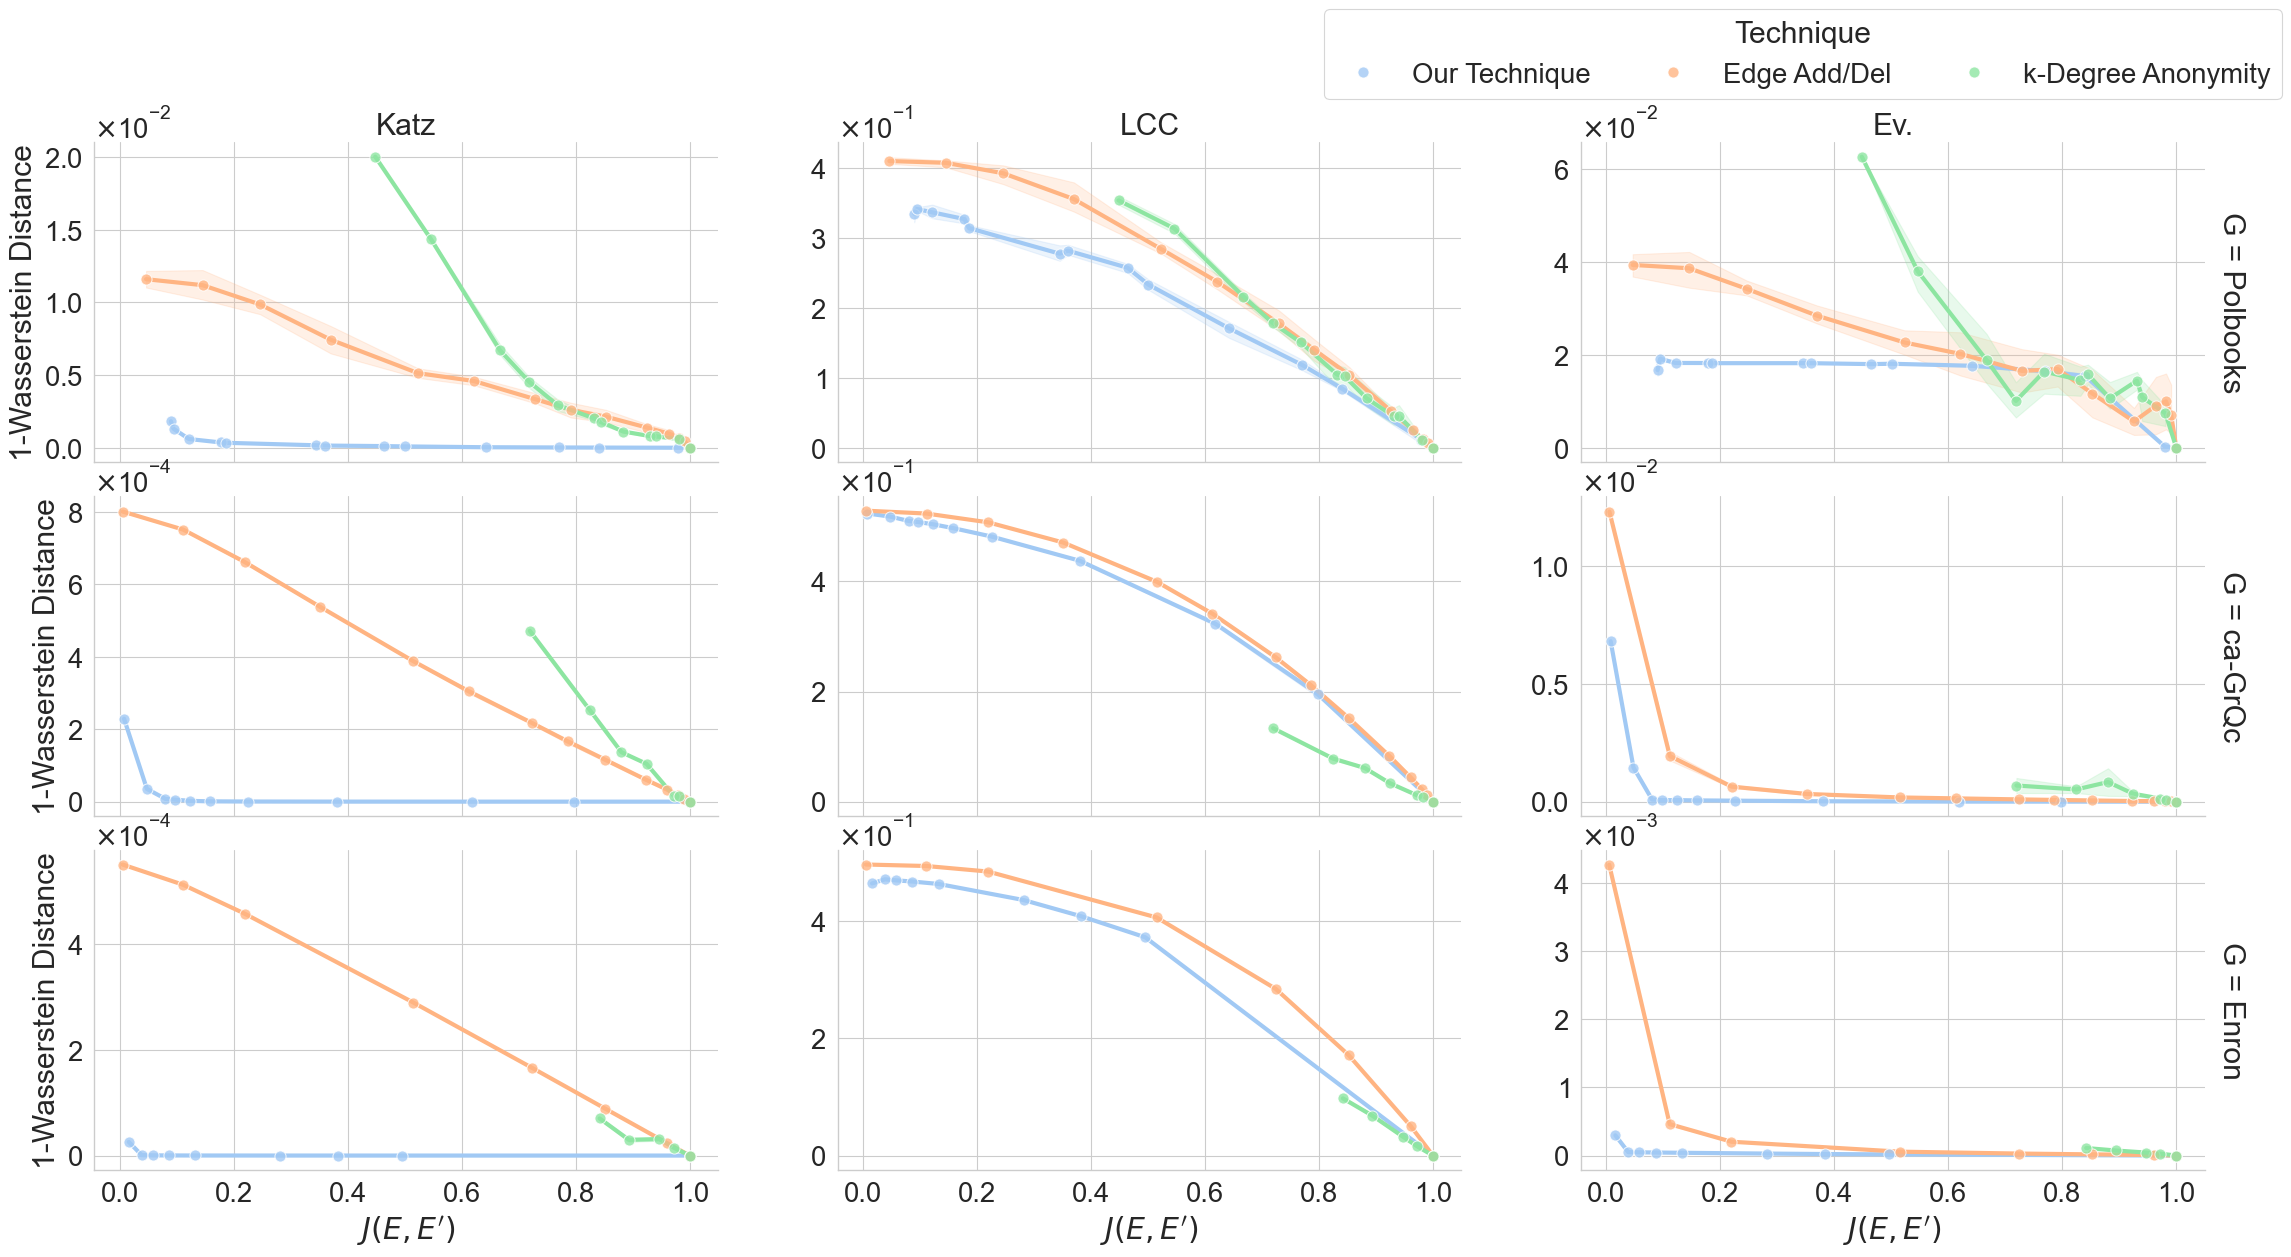

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def append_rows(samples, graph_name, method_names):
    for entry in samples:
        for method_name, metrics in entry.items():

            new_row = {"full_method_name": method_name, "G":graph_name}

            for name in method_names:
                if name in method_name:
                    new_row["method_type"] = name

            for metric, value in metrics.items():
                if isinstance(value, dict):
                    new_row[metric] = value['Ga']
                else:
                    new_row[metric] = value

            flat_rows.append(new_row)

def append_origin_rows(flat_rows, graph_name):
    flat_rows.append({"Katz": 0, "Ev.":0, "LCC":0, "EJacc":1, "method_type": "Eager", "G": graph_name, "full_method_name":"None"})
    flat_rows.append({"Katz": 0, "Ev.":0, "LCC":0, "EJacc":1, "method_type": "Anonymity", "G":graph_name, "full_method_name":"None"})
    flat_rows.append({"Katz": 0, "Ev.":0, "LCC":0, "EJacc":1, "method_type": "Edge Add/Del", "G":graph_name, "full_method_name":"None"})


with open('cache/exp3_figure_enron_samples_data.pkl', 'rb') as f:
    enron_samples_data = pickle.load(f)

with open('cache/exp3_figure_ca_GRQC_samples_data.pkl', 'rb') as f:
    ca_GrQc_samples_data = pickle.load(f)

with open('cache/exp3_figure_polbooks_samples_data.pkl', 'rb') as f:
    polbooks_samples_data = pickle.load(f)

flat_rows = []
append_rows(polbooks_samples_data, "Polbooks", method_names = ["Eager", "Anonymity", "Edge Add/Del"])
append_rows(ca_GrQc_samples_data, "ca-GrQc", method_names = ["Eager", "Anonymity", "Edge Add/Del"])
append_rows(enron_samples_data, "Enron", method_names = ["Eager", "Anonymity", "Edge Add/Del"])
append_origin_rows(flat_rows, "Enron")
append_origin_rows(flat_rows, "ca-GrQc")
append_origin_rows(flat_rows, "Polbooks")

df = pd.DataFrame(flat_rows)
df['EJacc'] = df.groupby(['G', 'full_method_name'])['EJacc'].transform('mean')

df_melted = df.melt(id_vars=['EJacc', 'method_type', 'G'],
                    value_vars=['Katz', 'LCC', 'Ev.'],
                    var_name='Metric',
                    value_name='1-Wasserstein Distance')

df_melted['method_type'] = df_melted['method_type'].replace('Anonymity', 'k-Degree Anonymity')
df_melted['method_type'] = df_melted['method_type'].replace('Eager', 'Our Technique')

sns.set_theme(style="whitegrid", context='paper', palette='pastel', font_scale=2.25)

g = sns.FacetGrid(df_melted, row="G", col="Metric", hue='method_type', sharey=False, height=4, aspect=1.15, margin_titles=True, despine=True)

g.map(sns.lineplot, "EJacc", "1-Wasserstein Distance", linewidth = 3, alpha = 1, err_kws={"alpha":0.2}, errorbar=('ci', 95))
g.map(sns.lineplot, "EJacc", "1-Wasserstein Distance", marker="o", markersize=8, alpha=0.8, linewidth = 0, err_kws={"alpha":0})

g.set_axis_labels("$J(E,E')$", "1-Wasserstein Distance")
g.set_titles(col_template="{col_name}")
g.add_legend(title='Technique', loc= 'upper center', bbox_to_anchor=(0.8, 1.07), ncol=3,frameon=True)
plt.tight_layout()

for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.savefig("figures/Experiment_2_plot.pdf", bbox_inches="tight")
plt.show()
